In [18]:
!pip install mlxtend
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
books= pd.read_csv('book.csv')
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## Apriori Algorithm

In [3]:
frequent_item=apriori(books, min_support=0.1, use_colnames=True)
frequent_item

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [24]:
rules=association_rules(frequent_item, metric='lift', min_threshold=0.7)
rules
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


#### as we apply support value 10% and lift ratio 0.7
#### 1st association rule, person who buys cook Books may also buy Italian Cook books
#### 2nd association rule,  person who buys Child Books,Art Books may also buy Geography Books
#### 3rd association rule, person who buys DoltYBks, Cook books may also buy Art Books
#### 4th association rule, person who buys Cook books,art book may also have chance of buying geography books
#### 5th association rule, person who buys geography book, cook books may also have buy Art book

In [5]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


#### we will increase the support value and lift ratio value and check the result

In [6]:
frequent_item1=apriori(books, min_support=0.2, use_colnames=True)
frequent_item1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [8]:
rules1=association_rules(frequent_item1, metric='lift', min_threshold=1)
rules1
rules1.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


##### by changing support to 20% and lift ratio as 1
##### association rule is person who buys Child books may also have chances of buying cook books

In [23]:
rules2=association_rules(frequent_item, metric='confidence', min_threshold=0.7)
rules2.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
16,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
17,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
18,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
15,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
14,"(DoItYBks, GeogBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446


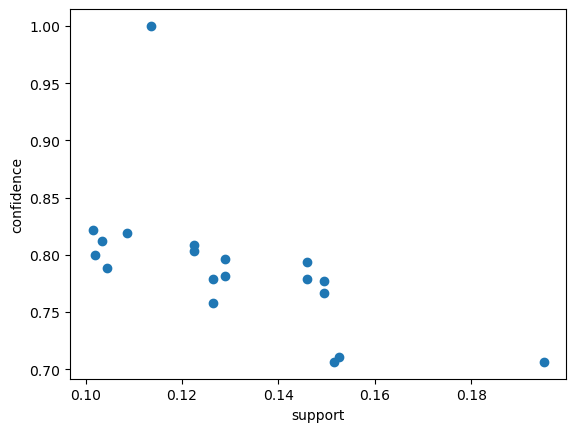

In [19]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()